**The core features of the model are as follows −**

Input layer consists of (1, 8, 28) values.

First layer, Conv2D consists of 32 filters and ‘relu’ activation function with kernel size, (3,3).

Second layer, Conv2D consists of 64 filters and ‘relu’ activation function with kernel size, (3,3).

Thrid layer, MaxPooling has pool size of (2, 2).

Fifth layer, Flatten is used to flatten all its input into single dimension.

Sixth layer, Dense consists of 128 neurons and ‘relu’ activation function.

Seventh layer, Dropout has 0.5 as its value.

Eighth and final layer consists of 10 neurons and ‘softmax’ activation function.

Use categorical_crossentropy as loss function.

Use accuracy as metrics.


In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [53]:
mist=tf.keras.datasets.mnist #This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images

In [54]:
(x_train,y_train),(x_test,y_test)=mist.load_data()

In [55]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

6000 k images and every image is of 28*28 size

**For plotting image**

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

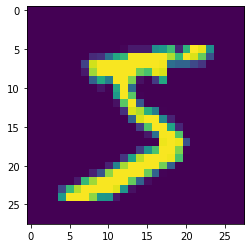

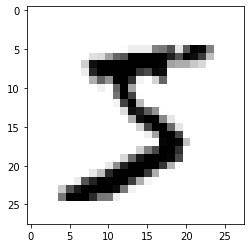

In [57]:
i=0
plt.imshow(x_train[i])
plt.show()
plt.imshow(x_train[i],cmap=plt.cm.binary)



checking the value of each pixel

Before Normalization

In [58]:
print(x_train[0]) # will give pixel value 0 will be black and 255 will be white in color , all other are in grey color

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

As image are in Grey color (0 to 255 ) not in RGB

For Normalization -data

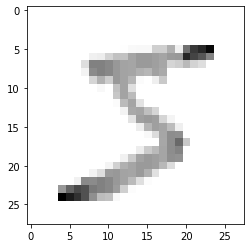

In [59]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

plt.imshow(x_train[i],cmap=plt.cm.binary)
plt.show()


**After Normalization**

In [60]:
print(x_train[0]) # all value will be between 0 to 1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Here all the values range between 0 and 1  as it was divided by 255.
its a necessary step.

In [61]:
print(y_train[0]) # just to check that dataset has label inside

5


**Resizing image to make it suitable for apply Convolution operation**

In [62]:
import numpy as np
Image_Size=28
x_trainr=np.array(x_train).reshape(-1,Image_Size,Image_Size,1) # Convolution operation we need to increase dimension by 1 for kernal operation
x_testr=np.array(x_test).reshape(-1,Image_Size,Image_Size,1) # Convolution operation we need to increase dimension by 1 for kernal operation

print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Creating a Deep Neural Network**

**Training on 60000 samples of MNIST handwritten dataset**

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [65]:
#creating model
model=Sequential()

## First Convntional layer 0 1 2 3 4 (6000,28,28,1)
model.add(Conv2D(64,kernel_size =(3,3),input_shape=x_trainr.shape[1:]))## only for first convolution layer to mention input layer size
model.add(Activation('relu')) ## activation function to make it non-linear,<0 ,remove,>0
model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling Single maximum value of 2*2

## 2nd Convntional layer
model.add(Conv2D(64,kernel_size =(3,3)))## 2nd Convntional layer
model.add(Activation('relu')) ## activation function to make it non-linear,<0 ,remove,>0
model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling Single maximum value of 2*2

## 3rd Convntional layer
model.add(Conv2D(64,kernel_size =(3,3)))## 3rd Convntional layer
model.add(Activation('relu')) ## activation function to make it non-linear,<0 ,remove,>0
model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling Single maximum value of 2*2


## Fully Convntional layer # 1
model.add(Flatten())## Before using Fully  Convntional layer, ned to flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation('relu')) ## activation function to make it non-linear,<0 ,remove,>0



## Fully Convntional layer#2
model.add(Dense(32))
model.add(Activation('relu')) ## activation function to make it non-linear,<0 ,remove,>0


## Last Convntional layer,output must be equal to number of classes 10(0-9)
model.add(Dense(10))
model.add(Activation('softmax')) ## activation function change to softmax(Class Probability-10)
# for binary classification , one neuron  in dense layer, sigmoid.


In [66]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_12 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_13 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [67]:
print("Total training Samaples=",len(x_trainr))

Total training Samaples= 60000


In [68]:
#before traing we need to comile my model
model.compile(loss = "sparse_categorical_crossentropy", 
   optimizer = 'adam', metrics = ['accuracy'])



 **Train the model** 

In [69]:
model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 73s 55ms/step - loss: 0.3306 - accuracy: 0.8952 - val_loss: 0.1323 - val_accuracy: 0.9583
Epoch 2/5
1313/1313 [==============================] - 73s 55ms/step - loss: 0.1002 - accuracy: 0.9691 - val_loss: 0.0932 - val_accuracy: 0.9716
Epoch 3/5
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0742 - accuracy: 0.9770 - val_loss: 0.0702 - val_accuracy: 0.9787
Epoch 4/5
1313/1313 [==============================] - 74s 57ms/step - loss: 0.0563 - accuracy: 0.9829 - val_loss: 0.0618 - val_accuracy: 0.9811
Epoch 5/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0449 - accuracy: 0.9857 - val_loss: 0.0797 - val_accuracy: 0.9784


Step 7 − Evaluate the model

In [70]:
test_loss,test_acc = model.evaluate(x_testr, y_test) 

print('Test loss on 10000 test samples:', test_loss) 
print('Test accuracy on 10000 test samples:', test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0640 - accuracy: 0.9803
Test loss on 10000 test samples: 0.06400466710329056
Test accuracy on 10000 test samples: 0.9803000092506409


The test accuracy is 98.03%. We have created a best model to identify the handwriting digits.

In [72]:
pred = model.predict(x_testr) 

In [73]:
print(pred)

[[1.25618578e-06 2.81484336e-06 7.16011527e-06 ... 9.99965072e-01
  4.67316852e-07 1.08156082e-05]
 [4.52559652e-05 1.24953579e-06 9.99878526e-01 ... 1.21672429e-05
  7.12460223e-06 1.35843584e-06]
 [1.49881612e-06 9.99978304e-01 3.91563816e-07 ... 6.35642709e-06
  1.14147065e-08 4.46657214e-06]
 ...
 [5.75169357e-10 8.36822664e-08 1.09124390e-10 ... 7.40891437e-09
  2.95498346e-08 1.85574379e-07]
 [1.98902228e-07 1.74288206e-09 3.64539163e-11 ... 5.64873148e-11
  7.99459085e-05 5.10210441e-07]
 [2.62982707e-04 1.09781539e-07 1.58942032e-06 ... 2.43215847e-09
  3.12261250e-06 6.16660873e-06]]


**For verification of prediction let see some example**

**Example 1.**

In [74]:
#In order to understand ,convert the predictions from one hot encoding , we need to use numpy for that 
print(np.argmax(pred[0]))  ## so actually argmax will return the maximum value index find the   value of it 

7


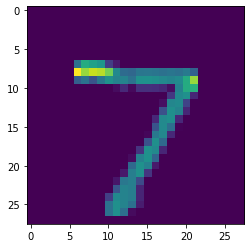

In [75]:
#now to check our answer is true or not
#plt.imshow(x_test[0])

plt.imshow((tf.squeeze(x_test[0])))

**Example 2.**

In [76]:
#In order to understand ,convert the predictions from one hot encoding , we need to use numpy for that 
print(np.argmax(pred[21]))  ## so actually argmax will return the maximum value index find the   value of it 

6


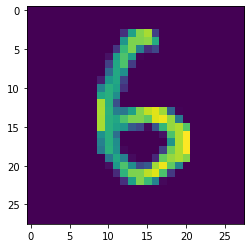

In [77]:
#now to check our answer is true or not
#plt.imshow(x_test[21])

plt.imshow((tf.squeeze(x_test[21])))

So based on above 2 example , we  can say our model is predicted well.

In [78]:
import cv2

In [127]:
img=cv2.imread('/content/8.png')

In [128]:
img.shape

(462, 466, 3)

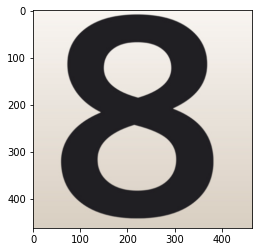

In [129]:
plt.imshow(img)

Here size need to resized as per dataset (28*28).

Also it is a colour image , need to convert into gray image

In [130]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [119]:
gray.shape

(235, 246)

Here 3 channel gone and in oen  channel

In [131]:
resized=cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [132]:
resized.shape

(28, 28)

In [133]:
newing =tf.keras.utils.normalize(resized,axis=1) # normalizing 0 to 1 Scalling

In [134]:
newing=np.array(newing).reshape(-1,Image_Size,Image_Size,1) # Convolution operation we need to increase dimension by 1 for kernal operation

In [135]:
newing.shape

(1, 28, 28, 1)

In [136]:
pred = model.predict(newing) 

In [137]:
print(np.argmax(pred))

8
